### Student Information
Name: Alex Hernandez

Student ID: 108065427

GitHub ID:alexnehe

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [4]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

In [5]:
#Import libraries
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import nltk
import plotly as py
import math
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer


from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

#Data visualization libraries
import matplotlib.pyplot as plt
from plotly import tools
import seaborn as sns
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Dimensionality Reduction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity



#Set up for homework exercises
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

#helpers
import helpers.data_mining_helpers as dmh

#Construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

#Add category to the dataframe
X['category'] = twenty_train.target

X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

** >>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [7]:
#Query and specify whether the first 30 records belong to either the 1st, 2nr or 3rd category
X.query('(category == [1, 2, 3])')[0:30] 

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [10]:


NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [12]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer**

`.isnull()` Detects missing values for an array-like object.This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

DataFrame.isnull(self) method will only return True if a value is missing, NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values.
In this case the explicity declared strings 'NaN', 'None' and empty string '' are evaluated as False because the method has no way of knowing what is the value inside the string


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [14]:
X_sample = X.sample(n=1000) #random state

In [16]:
len(X_sample)

1000

In [17]:
X_sample[0:4]

,text,category,category_name
2181,From: phs431d@vaxc.cc.monash.edu.au Subject: R...,3,soc.religion.christian
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
933,From: noble@possum.den.mmc.com (Joe A Noble) S...,1,comp.graphics
941,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,3,soc.religion.christian


**Answer**

Results are random. However, our original data set X is not affected when using the DataFrame.sample() method. The method only creates a copy of ramdomly selected items which then is assigned to the X_sample.
Since the samples are taken randomly, the method doesn't ensure sorting. 
If sorting in ascending order is needed, we can use X_sample.sort_index().

In [22]:
X_sample = X.sample(n=1000)

In [24]:
len(X_sample)

1000

In [29]:
X_sample.sort_index(ascending=True)

,text,category,category_name
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics
...,...,...,...
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

AxesSubplot(0.125,0.125;0.775x0.755)


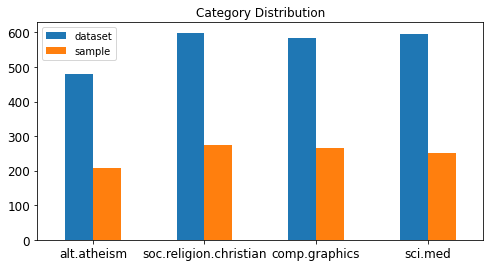

In [31]:
# Answer here
sample_counts = X_sample.category_name.value_counts()
actual_counts = X.category_name.value_counts()

combined_data_frame = pd.DataFrame({'dataset': actual_counts,
                    'sample': sample_counts}, index = categories)

print(combined_data_frame.plot.bar(title = 'Category Distribution', rot = 0, fontsize = 12, figsize = (8,4)))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [33]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [35]:
# Answer here
array = X_counts[4:5, 0:100].toarray() #obtain the fifth record

'''
We can print all the words contained in the sentence from the first 100 words,
the second word printed correspond to the second 1 in the array

'''

for word in count_vect.inverse_transform(array)[0]:
    print('word: %s' % word)

word: 00
word: 01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

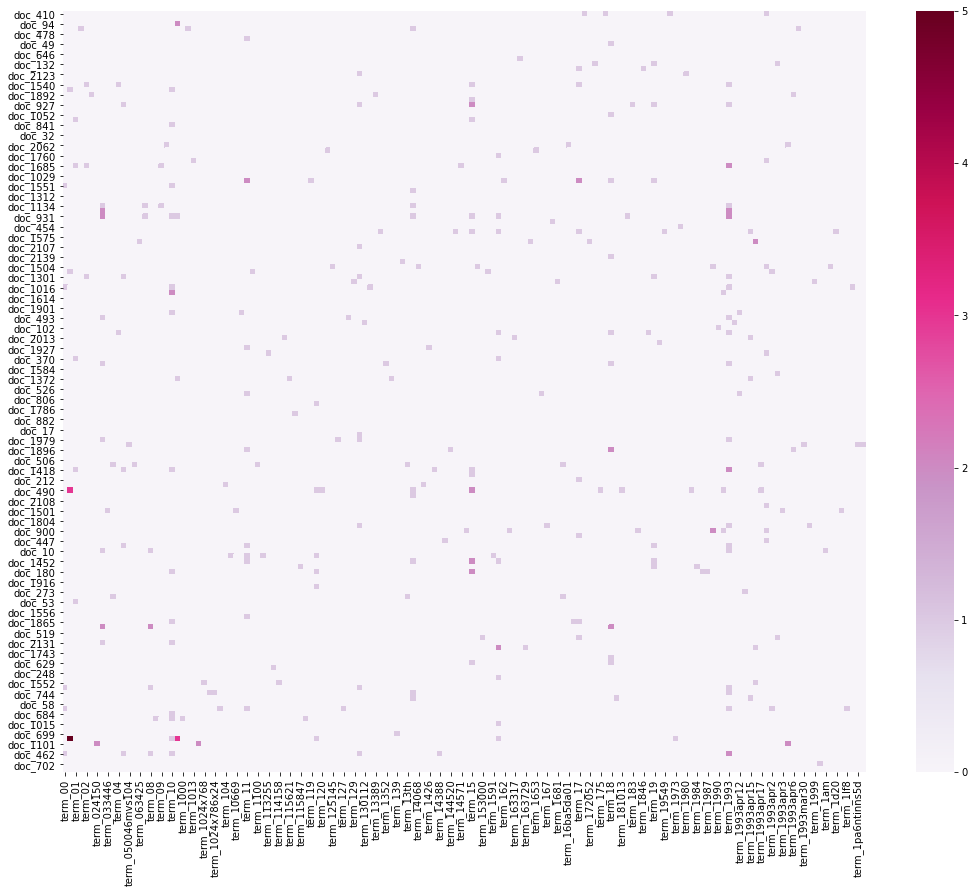

In [42]:
n = 150
sample_X = X.sample(n=n, random_state = 26)
sample_count_vect = CountVectorizer()
sample_counts = sample_count_vect.fit_transform(sample_X.text)
plot_x = ["term_"+str(i) for i in sample_count_vect.get_feature_names()[0:n]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(sample_X.index)[:n]]
plot_z = sample_counts[0:n, 0:n].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, annot=False)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Dimension:
(2257, 3)


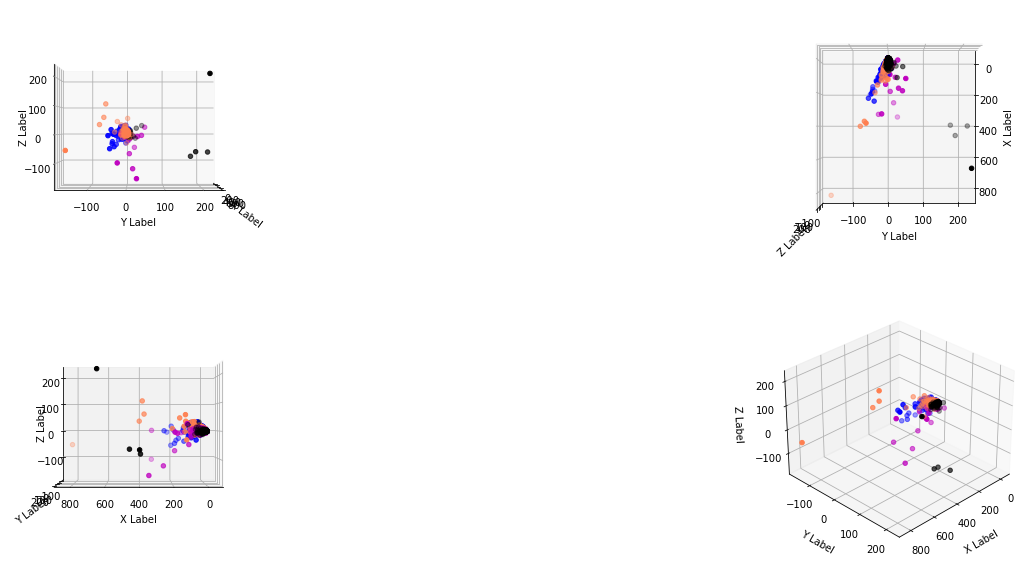

In [47]:
# Answer here
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print('Dimension:')
print(X_reduced3.shape)

col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize = (25,10))

ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
    
    ax1.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax2.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax3.scatter3D(xs, ys, zs, c= c, marker = 'o')
    ax4.scatter3D(xs, ys, zs, c= c, marker = 'o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')
ax1.view_init(0, 0)

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(90, 0)

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(0, 90)

ax4.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax4.set_xlabel('\nX Label')
ax4.set_ylabel('\nY Label')
ax4.set_zlabel('\nZ Label')
ax4.view_init(30, 45)

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [48]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [53]:
# Answer here
data = go.Bar(x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:300]], #string concatenation with every term is needed, otherwise plotly won't work
            y=term_frequencies[:300])

fig = go.Figure(data)

fig.update_layout(
    title=go.layout.Title(
        text="Term Frequencies",
        xref="paper",
        x=0
    )
)

fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [57]:
# Answer here
term_frequencies_df = pd.DataFrame({'terms': count_vect.get_feature_names(), 
                                            'counts': term_frequencies})
sample_term_frequencies_df = term_frequencies_df.sample(n=100, random_state=26)

sample_data = go.Bar(x = ["term_"+str(i) for i in sample_term_frequencies_df['terms']],
            y=sample_term_frequencies_df['counts'])

fig = go.Figure(sample_data)

fig.update_layout(
    title=go.layout.Title(
        text="Sample Data Terms",
        xref="paper",
        x=0
    )
)

fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [61]:
# Answer here

#We are using a sample of the dataset
#order the terms
ordered_term_frequencies_df = sample_term_frequencies_df.sort_values(by = 'counts', ascending = False)

#generate graph
ordered_data = go.Bar(x=["term_"+str(i) for i in ordered_term_frequencies_df['terms']],
            y=ordered_term_frequencies_df['counts'])

fig = go.Figure(ordered_data)

fig.update_layout(
    title=go.layout.Title(
        text="Long-tailed distribution in Sample",
        xref="paper",
        x=0
    )
)

fig.show()

#### Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [62]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[:10]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


## Part 2: Working with the New Data Set 

### a) Create a Dictionary with the given Data Set:

In [69]:
import helpers.data_mining_helpers as dmh

#load data into python array
sentiment_data_array = []
with open("sentiment_labelled_sentences/amazon_cells_labelled.txt","r") as amazon_data:
    sentiment_data_array += [string + '\tamazon' for string in amazon_data.read().split('\n')]
with open("sentiment_labelled_sentences/imdb_labelled.txt","r") as imdb_data:
    sentiment_data_array += [string + '\timdb' for string in imdb_data.read().split('\n')]
with open("sentiment_labelled_sentences/yelp_labelled.txt","r") as yelp_data:
    sentiment_data_array += [string + '\tyelp' for string in yelp_data.read().split('\n')]

#create dictionary with the array
sentiment_data = dmh.sentiment_data_dictionary(sentiment_data_array)

**Converting Dictionary into panda Dataframes**

In [78]:
sentiment_df = pd.DataFrame.from_records(data = {"sentence":sentiment_data['sentences'], "score":sentiment_data['scores'], "source":sentiment_data['sources']})

**Print the first 20 records from the dataframe**

In [79]:
#Print the 1st 20 records
sentiment_df[:20]

,score,sentence,source
0,0,So there is no way for me to plug it in here i...,amazon
1,1,"Good case, Excellent value.",amazon
2,1,Great for the jawbone.,amazon
3,0,Tied to charger for conversations lasting more...,amazon
4,1,The mic is great.,amazon
5,0,I have to jiggle the plug to get it to line up...,amazon
6,0,If you have several dozen or several hundred c...,amazon
7,1,If you are Razr owner...you must have this!,amazon
8,0,"Needless to say, I wasted my money.",amazon
9,0,What a waste of money and time!.,amazon


**Print the last 10 sentences (only sentence and source colum)**

In [80]:
sentiment_df[-10:][["sentence", "source"]]

,sentence,source
2990,The refried beans that came with my meal were ...,yelp
2991,Spend your money and time some place else.,yelp
2992,A lady at the table next to us found a live gr...,yelp
2993,the presentation of the food was awful.,yelp
2994,I can't tell you how disappointed I was.,yelp
2995,I think food should have flavor and texture an...,yelp
2996,Appetite instantly gone.,yelp
2997,Overall I was not impressed and would not go b...,yelp
2998,"The whole experience was underwhelming, and I ...",yelp
2999,"Then, as if I hadn't wasted enough of my life ...",yelp


**Query every 10th record, first 10 records are printed**

In [77]:
# using loc (by position)
# query every 10th record in our dataframe, the query also containig the first 10 records 
sentiment_df.iloc[::10, 0:2][0:10]

,score,sentence
0,0,So there is no way for me to plug it in here i...
10,1,And the sound quality is great.
20,0,I went on Motorola's website and followed all ...
30,0,"This is a simple little phone to use, but the ..."
40,1,"It has a great camera thats 2MP, and the pics ..."
50,0,Not loud enough and doesn't turn on like it sh...
60,0,Essentially you can forget Microsoft's tech su...
70,0,Mic Doesn't work.
80,1,I wear it everyday and it holds up very well.
90,0,For a product that costs as much as this one d...


### C. Data Exploration and Manipulation

Check missing values

In [82]:
sentiment_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,score,sentence,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


There are no missing values in the dataset. To make sure that there will not be missing values the sentiment_data_dictionary method in the helpers file will ignore any rows that contain either a sentence none value or a score none value.

It this particular case it is better to ignore the rows that contain a none value because there is no way to generate a sentence if it is missing and if we try to estimate a 0 or 1 value for the score it will just contaminate the data.


Check for duplicated rows

In [90]:
#check if there are duplicated rows and remove them

duplicates = sum(sentiment_df.duplicated('sentence'))

print('Number of rows before cleaning: %d' % len(sentiment_df))
print('Duplicated rows: %d' % duplicates)

if duplicates > 0:
    sentiment_df.drop_duplicates(keep=False, inplace=True)
    
sentiment_df.reset_index(drop=True, inplace=True) #necessary because I discovered that after droping the duplicates the index
#keeps the old original values and when trying to access values with [] the wrong values were being returned

print('Rows after dropping duplicates: %d' % len(sentiment_df))

Number of rows before cleaning: 2966
Duplicated rows: 0
Rows after dropping duplicates: 2966


Sampling

In [91]:
#sampling
records = 700
sentiment_data_sample = sentiment_df.sample(n=records, random_state=26)

**Pie chart Vizualization**

In [95]:
labels = sentiment_df.source.value_counts().index
values = sentiment_df.source.value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.update_layout(
    title=go.layout.Title(
        text="Sentences Source",
        xref="paper",
        x=0
    )
)

fig.show()

**Scatter plot Visualization**

In [97]:
#new data visualization
#show the relation between the word count in each sentence and what sentiment it is attached to
sentiment_data_sample_2 = sentiment_df.sample(n = 100)
x_axis_array = ["sentence_" + str(index) for index in sentiment_data_sample_2.index]

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=x_axis_array, y=[len(sentence.split(' ')) for sentence in sentiment_data_sample_2.sentence],
                    mode='lines+markers',
                    name='Sentence Word Count'))

fig.add_trace(go.Scatter(x=x_axis_array, y=[score for score in sentiment_data_sample_2.score],
                    mode='lines+markers',
                    name='Sentence Score'))

fig.update_layout(
    title=go.layout.Title(
        text="Scatter Plot",
        xref="paper",
        x=0
    )
)

fig.show()

positive_sentences_array = [len(row.sentence.split(' ')) for index, row in sentiment_data_sample_2.iterrows() if row.score == '1']
print('Average word count in each positive sentence: ', sum(positive_sentences_array)/len(positive_sentences_array))

negative_sentences_array = [len(row.sentence.split(' ')) for index, row in sentiment_data_sample_2.iterrows() if row.score == '0']
print('Average word count in each negative sentence: ', sum(negative_sentences_array)/len(negative_sentences_array))


Average word count in each positive sentence:  11.703703703703704
Average word count in each negative sentence:  15.065217391304348
